<a href="https://colab.research.google.com/github/valeriameneses2409/LAB1_DAWv/blob/main/Pr%C3%A1cticaNDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar librerías necesarias
if (!require("readxl")) install.packages("readxl", repos = "http://cran.us.r-project.org")
if (!require("dplyr")) install.packages("dplyr", repos = "http://cran.us.r-project.org")
if (!require("ggplot2")) install.packages("ggplot2", repos = "http://cran.us.r-project.org")

library(readxl)
library(dplyr)
library(ggplot2)

In [ ]:
# Función para leer cualquier archivo según su extensión
leer_archivo <- function(nombre_archivo) {
  if (grepl("\\.csv$", nombre_archivo)) {
    read.csv(nombre_archivo)
  } else if (grepl("\\.xlsx$", nombre_archivo)) {
    read_excel(nombre_archivo)
  } else {
    stop("Formato de archivo no compatible.")
  }
}

In [ ]:
# Lista de nombres de archivos aqui agregamos todos los archivos
nombres_archivos <- c(
  "/dado.xlsx",
  "/1000dados.xlsx",
  "/dado 1.xlsx",
  "/DADO.csv",
  "/Dado 2.xlsx",
  "/Dados.xlsx",
  "/Lanzamientos Dado.xlsx",
  "/Lanzamientos_Dados.xlsx",
  "/DadosSharon.xlsx"  # Repetido, el archivo original se renombro para no ser igual a otro
)

# Crear lista para almacenar los resultados
resultados <- list()

In [ ]:
# Listar archivos disponibles
uploaded_files <- list.files()
print("Archivos disponibles:")
print(uploaded_files)

# Filtrar solo los archivos que nos interesan
nombres_archivos <- uploaded_files[grepl("\\.(csv|xlsx)$", uploaded_files)]

[1] "Archivos disponibles:"
 [1] "1000dados.xlsx"          "dado 1.xlsx"            
 [3] "Dado 2.xlsx"             "DADO.csv"               
 [5] "dado.xlsx"               "Dados.xlsx"             
 [7] "DadosSharon.xlsx"        "Lanzamientos Dado.xlsx" 
 [9] "Lanzamientos_Dados.xlsx" "sample_data"            


In [ ]:
# Procesar archivos
for (archivo in nombres_archivos) {
  cat("\nProcesando archivo:", archivo, "\n")

  df <- tryCatch({ leer_archivo(archivo) }, error = function(e) {
    cat("Error al leer", archivo, ":", conditionMessage(e), "\n")
    return(NULL)
  })
  if (is.null(df)) next

  df_numeric <- df[sapply(df, is.numeric)]
  if (ncol(df_numeric) == 0) {
    cat("Advertencia: El archivo", archivo, "no tiene columnas numéricas válidas.\n")
    next
  }

  columna <- na.omit(df_numeric[[1]])
  if (length(columna) == 0) {
    cat("Advertencia: El archivo", archivo, "no tiene datos numéricos válidos.\n")
    next
  }

  muestras <- replicate(30, sample(columna, 30, replace = length(columna) < 30), simplify = FALSE)
  sumas <- sapply(muestras, sum)
  promedios <- sapply(muestras, mean)
  resultados[[archivo]] <- list(sumas = sumas, promedios = promedios)
}


Procesando archivo: 1000dados.xlsx 


New names:
• `` -> `...2`



Procesando archivo: dado 1.xlsx 

Procesando archivo: Dado 2.xlsx 
Advertencia: El archivo Dado 2.xlsx no tiene columnas numéricas válidas.

Procesando archivo: DADO.csv 

Procesando archivo: dado.xlsx 

Procesando archivo: Dados.xlsx 

Procesando archivo: DadosSharon.xlsx 

Procesando archivo: Lanzamientos Dado.xlsx 

Procesando archivo: Lanzamientos_Dados.xlsx 


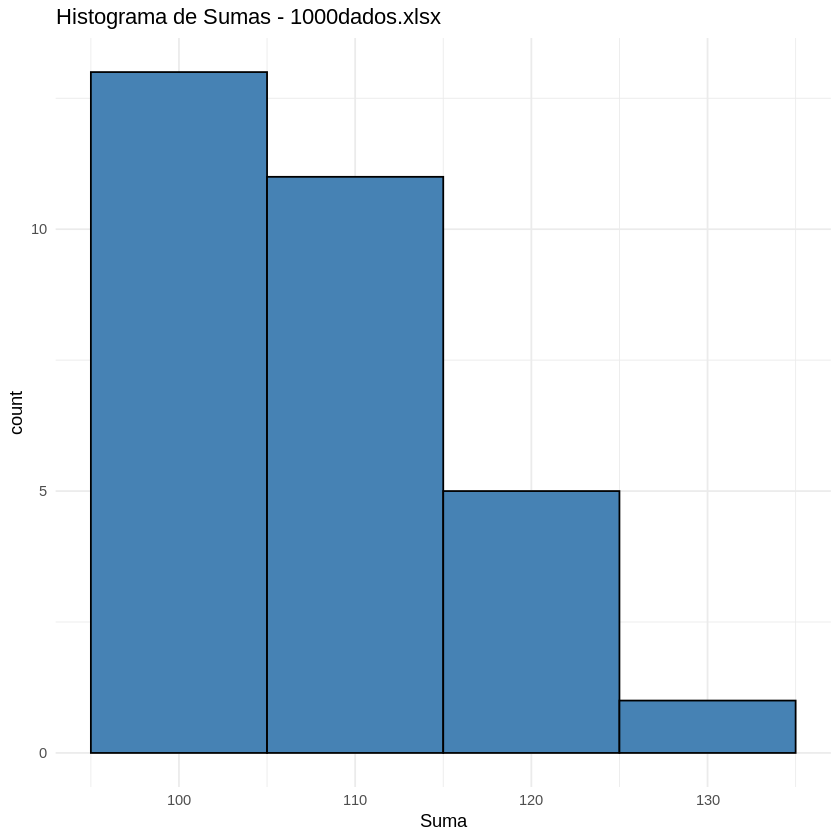

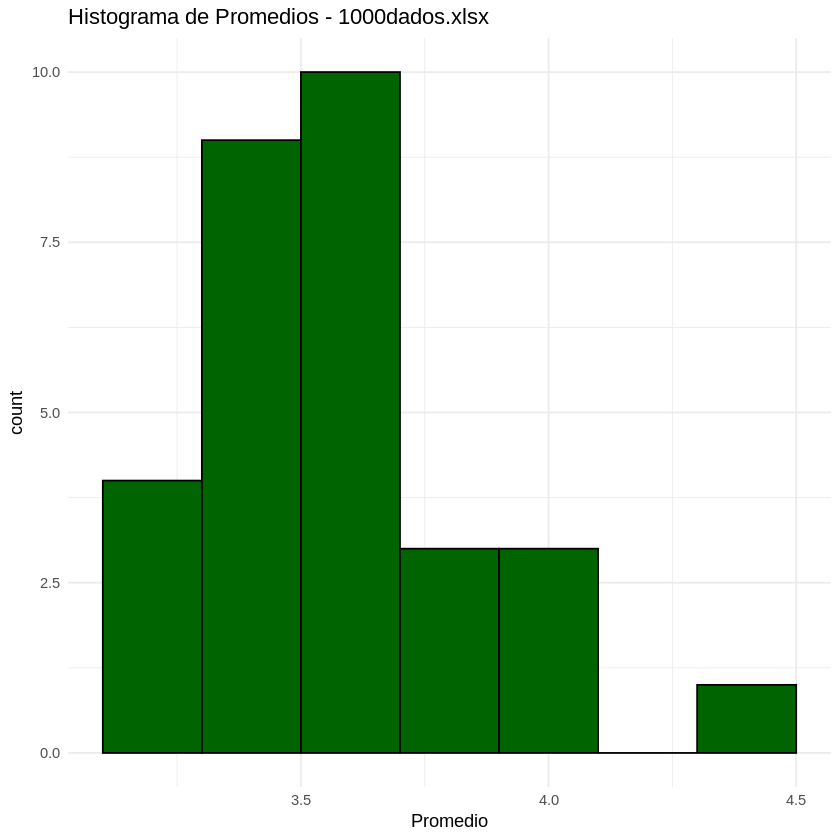

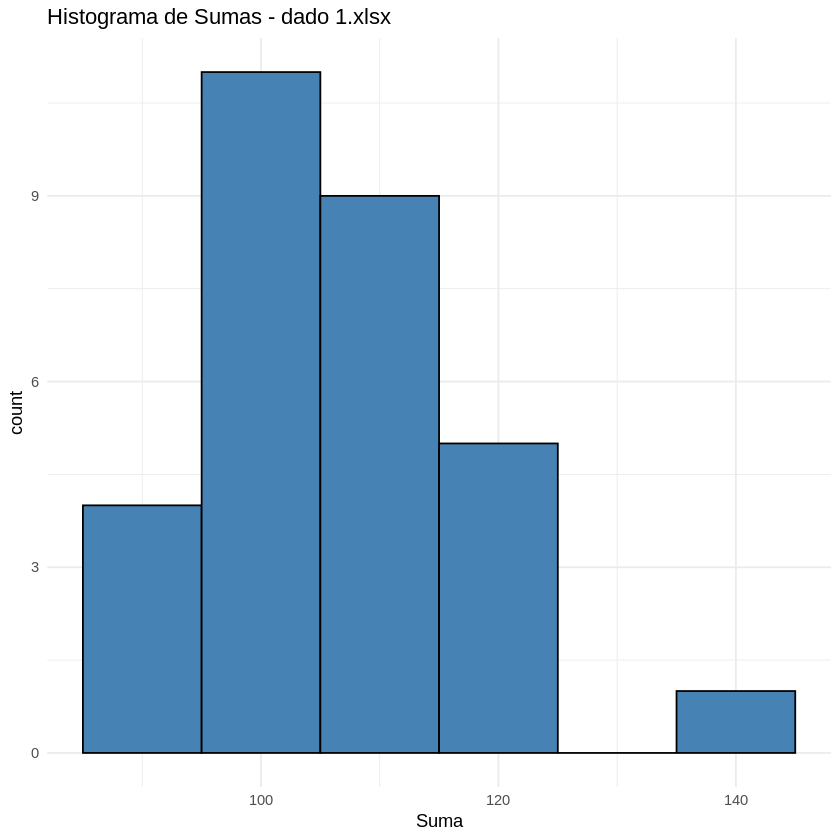

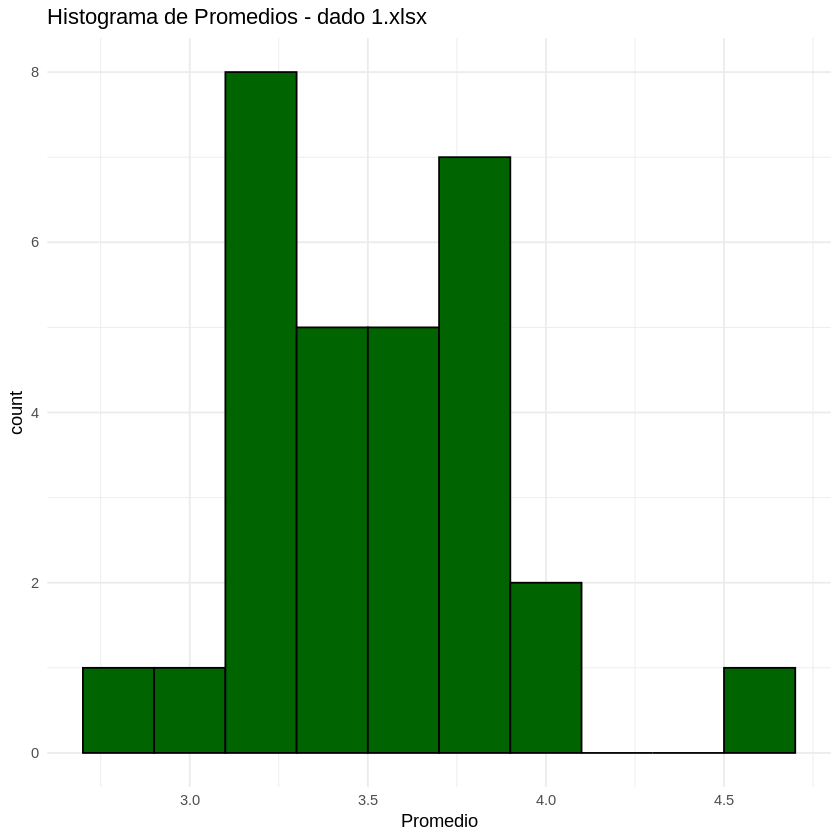

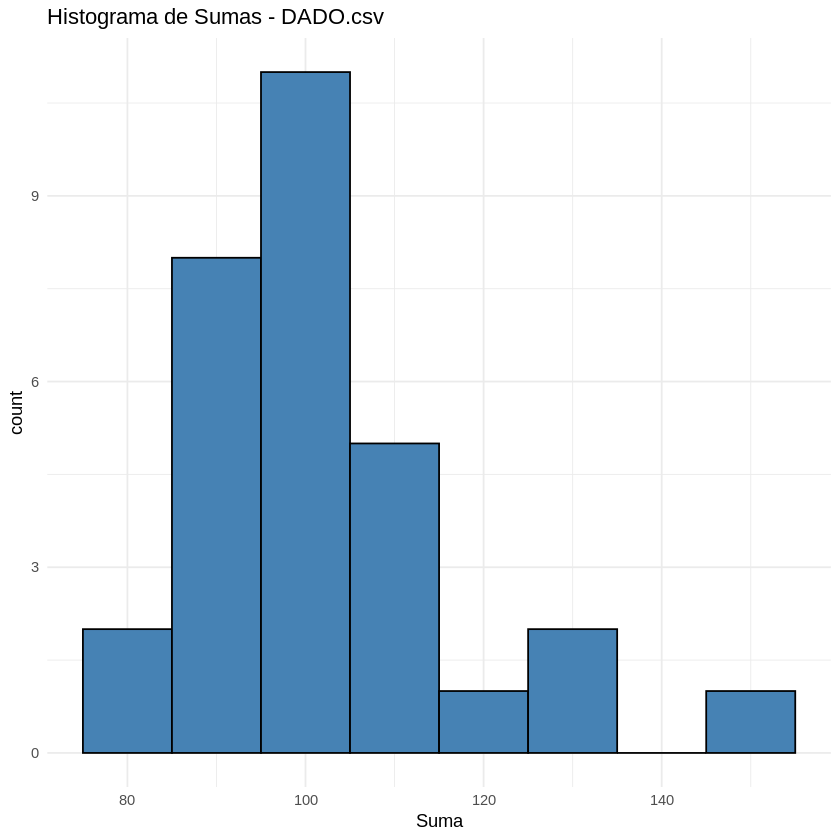

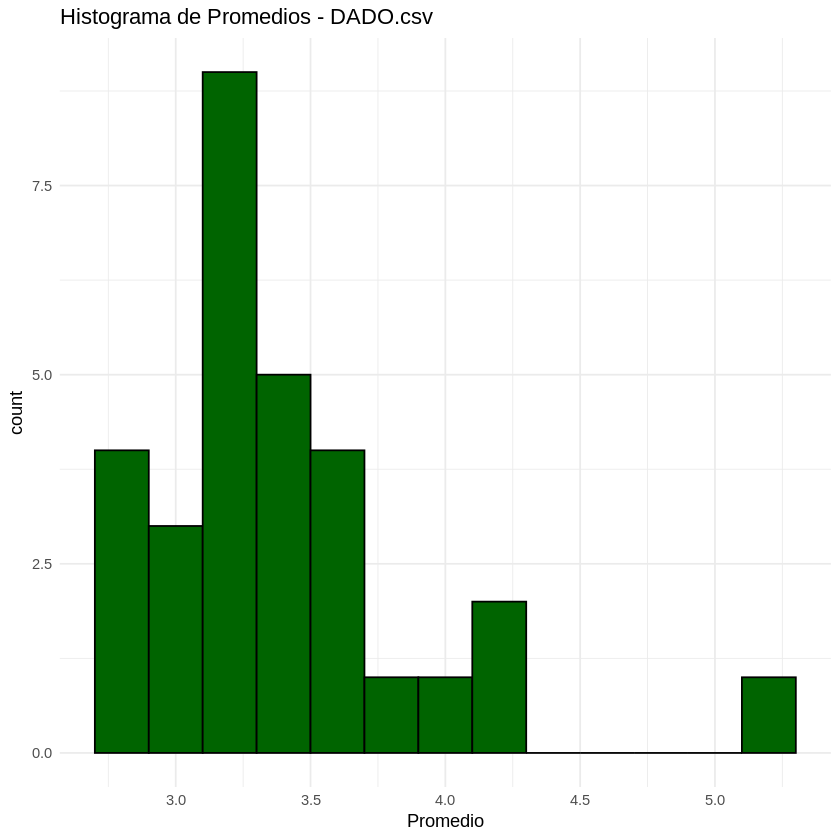

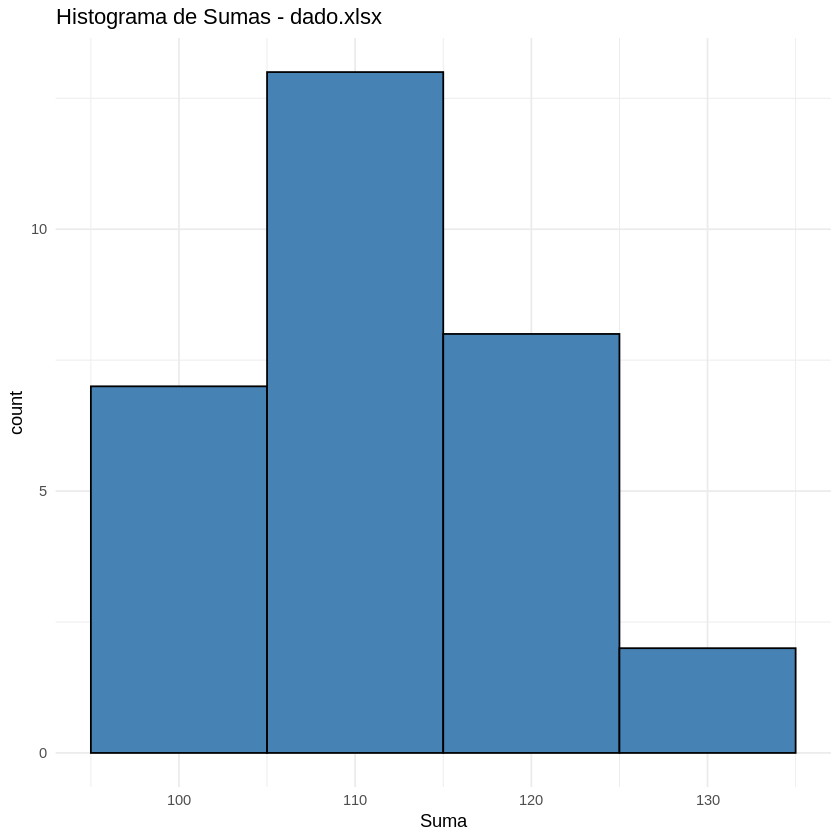

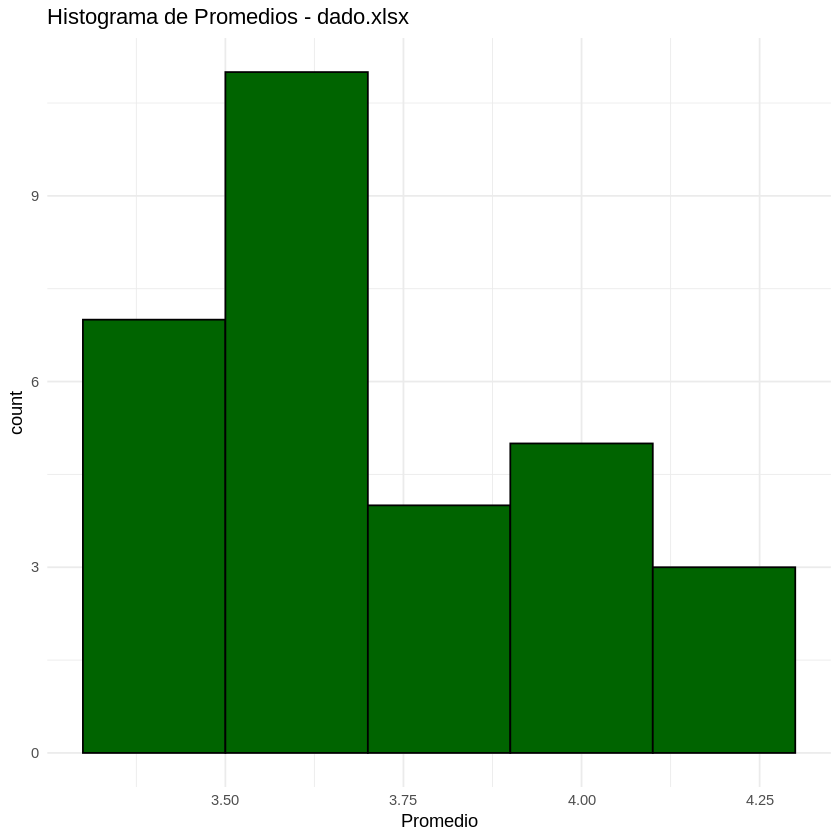

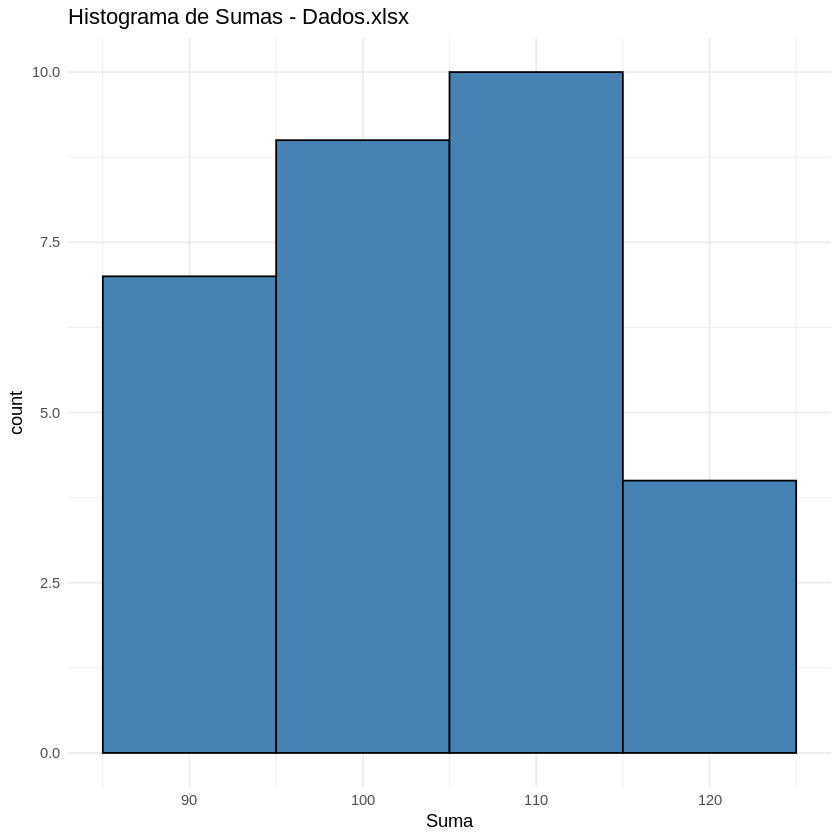

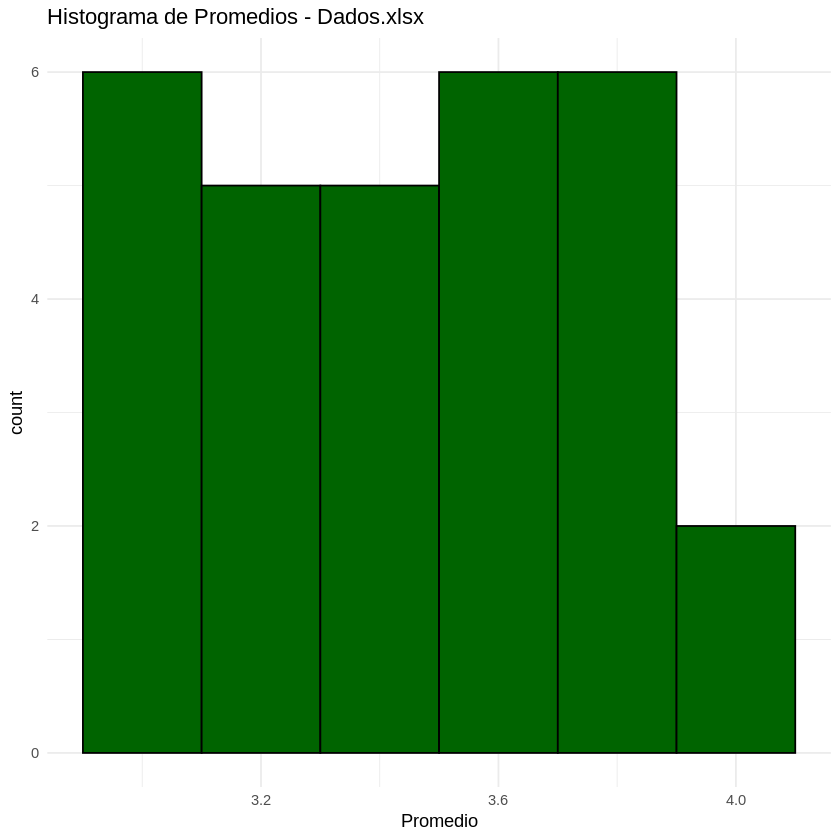

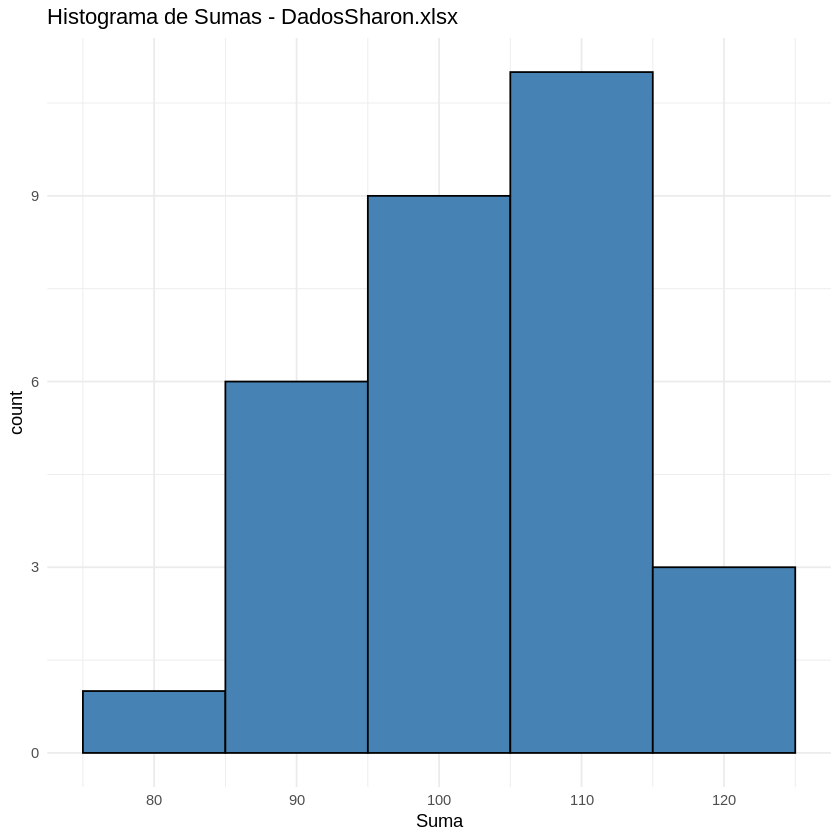

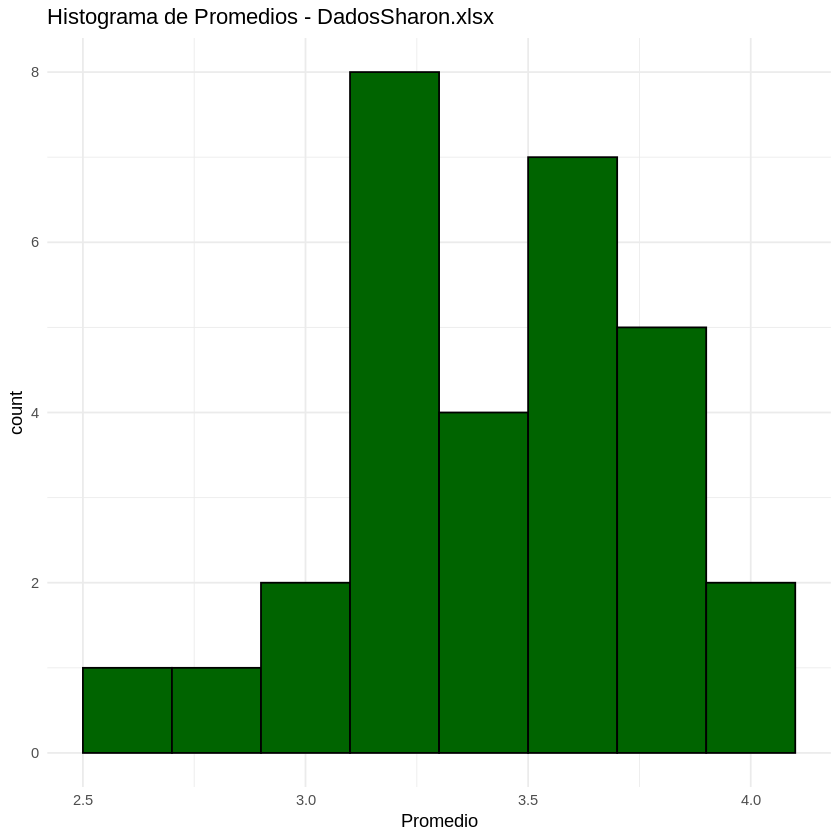

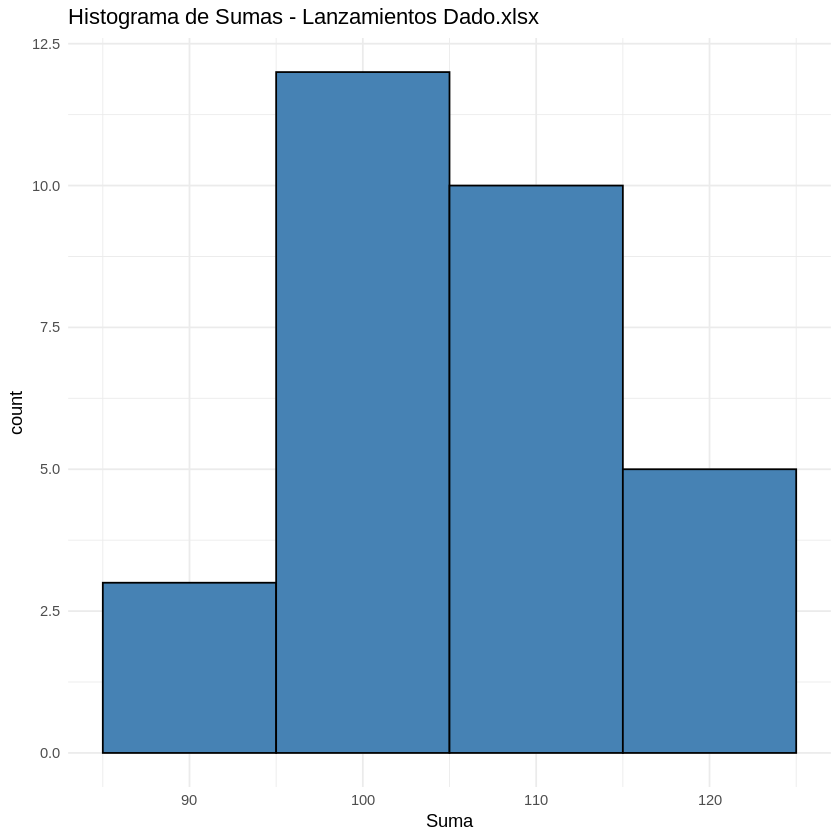

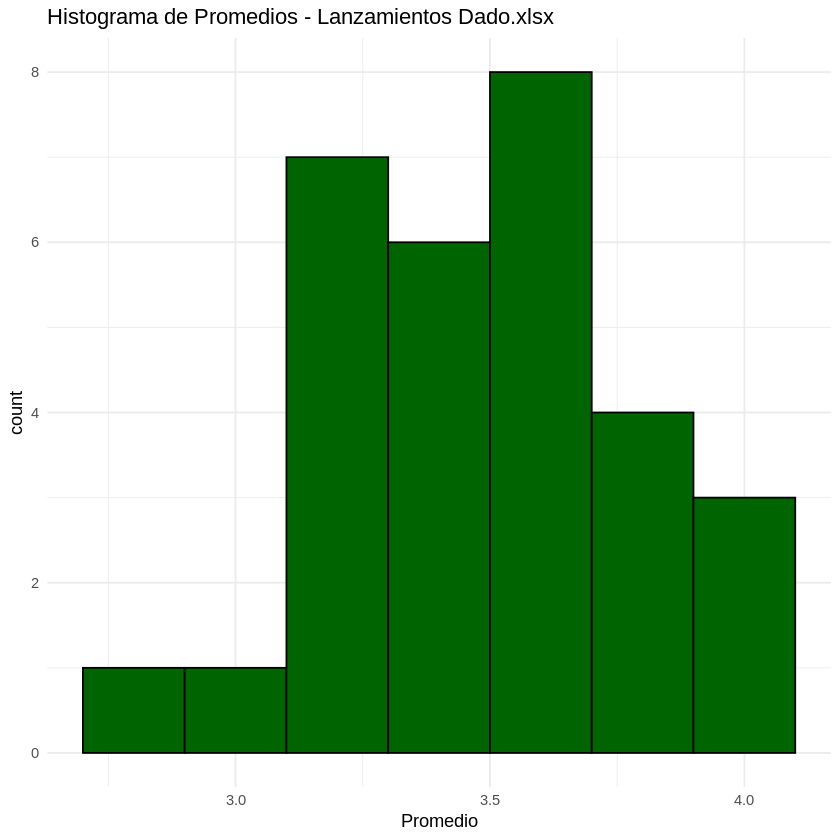

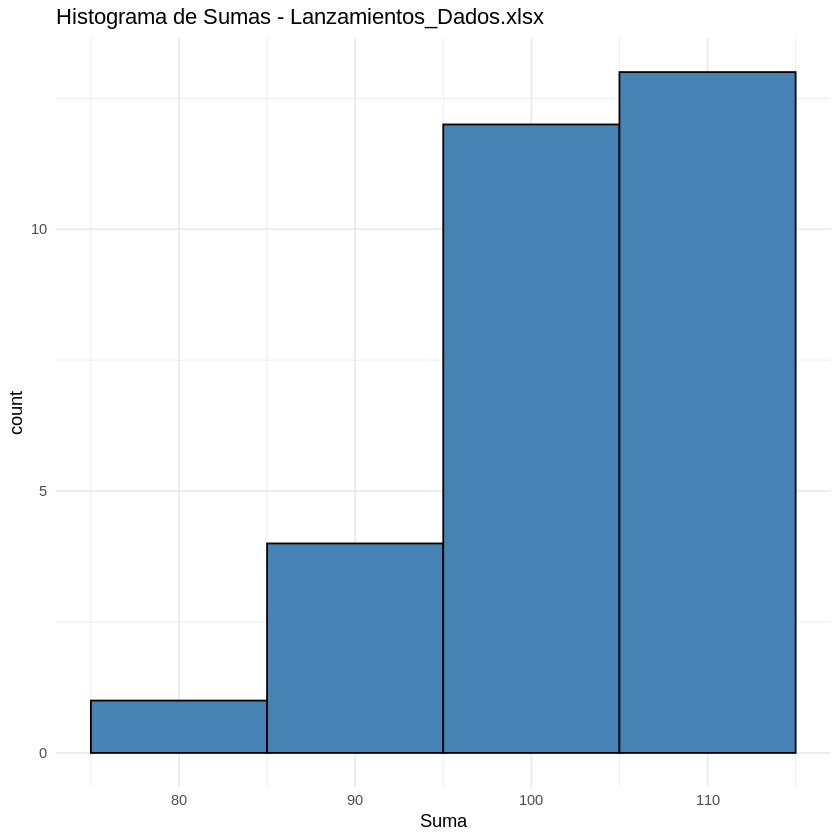

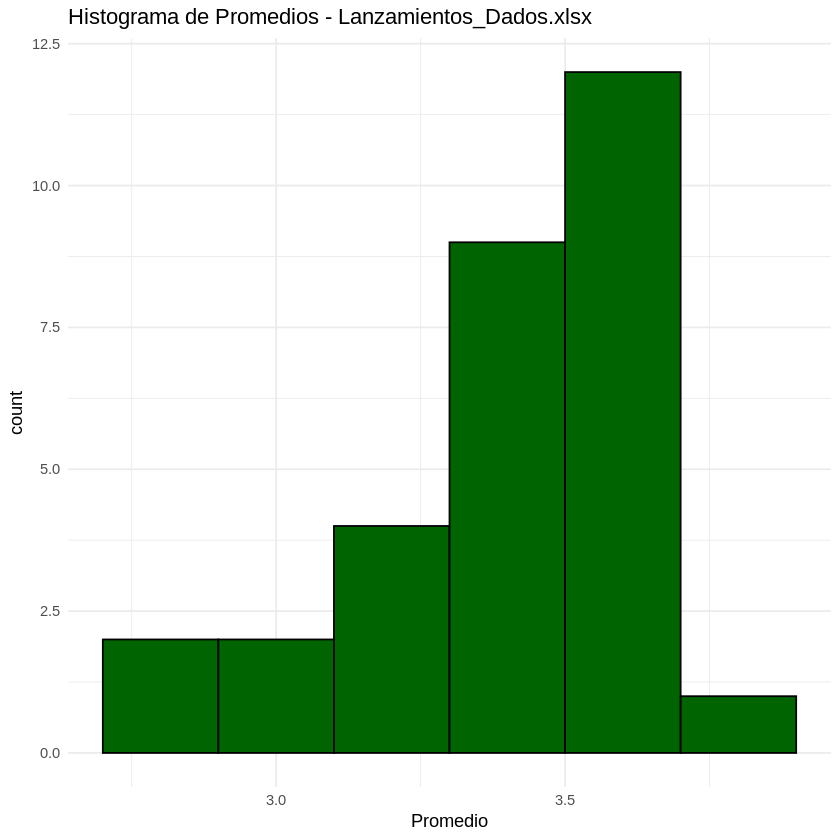

In [ ]:
# Histogramas individuales
for (archivo in names(resultados)) {
  datos <- resultados[[archivo]]

  df_sumas <- data.frame(Suma = datos$sumas)
  p1 <- ggplot(df_sumas, aes(x = Suma)) +
    geom_histogram(binwidth = 10, fill = "steelblue", color = "black") +
    ggtitle(paste("Histograma de Sumas -", archivo)) +
    theme_minimal()
  print(p1)

  df_prom <- data.frame(Promedio = datos$promedios)
  p2 <- ggplot(df_prom, aes(x = Promedio)) +
    geom_histogram(binwidth = 0.2, fill = "darkgreen", color = "black") +
    ggtitle(paste("Histograma de Promedios -", archivo)) +
    theme_minimal()
  print(p2)
}

In [ ]:
#En los histogramas individuales cada uno representa el nivel de dispersión
#El primer histograma que es el de 1000dados MUestra  las sumas y existe una distribución sesgada hacia valores más bajos
#El de los promedios da una distribución más centrada al rededor de un valor medio

In [ ]:
#El segundo histograma que es dado 1 en la parte de las sumas tiene valores que se extienden de 90 hasta 140 ,tiene una concentración alrededor de valores más bajos de la suma,
#Con una posible segunda concentración o valotres atípicos hacia el extremo superior.
#El promedio muestra una distribución bimodal  y cuentan con promedios de 3.0 y 3.75 y cuentan con diferentes tendencias.

In [ ]:
#El tercer histograma que es Dadoscsv Las sumas muestra una distribución sesgada hacia valores más bajos,con un pico de frecuencia alrededor de 100.
#El de los promedios presenta una distribución más centrada alrededor de 3.25,y la mayoría de datos tienen promedios cercanos.

In [ ]:
#El cuarto histograma dadoxlsx en la cuestión de suma cuenta con un pico de frecuencia  de 105, el de promedios tiene una distribución centrada de 3.5 son unimodales.

In [ ]:
#El quinto histograma que es Dadosxlsx en sumas tiene distribución dispersa tiene varios centros de frecuencia alrededor de 105.
#promedios tiene distribución unimodal de 3.25 y esta ligeramente sesgada hacia la derecha.

In [ ]:
#El sexto histograma dadosSharon La suma muestra que es unimodal centrada alrededor de 100, y promedios es unimodal pero esta centrada alrededor de 3.25.

In [ ]:
#El séptimo histograma lanzamientos Dados dice que en la suma y promedio tiene distribuciones simétricas ya que tienen 100 y 3.5.

In [ ]:
#El octavo histograma Lanzamientos_Dados tiene una suma que tiene sus distribuciones sesgadas hacia la izquierda con un pico alrededor de 105.
#Los promedios tienen distribución unimodal más simétrica,centrada alrededor de 3.5.

In [ ]:
#Conclusión tiene una tendencia central la mayoría de los archivos y los promedios tienden a agruparse alrededor de un valor central que ese sitúa entre 3.25 y 3.5,
#tienden a mostrar distribuciones más simétricas y unimodales y se concentran alrededor de la media solo en dado 1 tiene distribución bimodal.
#Las sumas muestran mayor variablididad y tienen un rango de 100 hasta 105,tienen más sesgo hacia la derecha o izquierda a excepción de Dados tiene distribución trimodal.

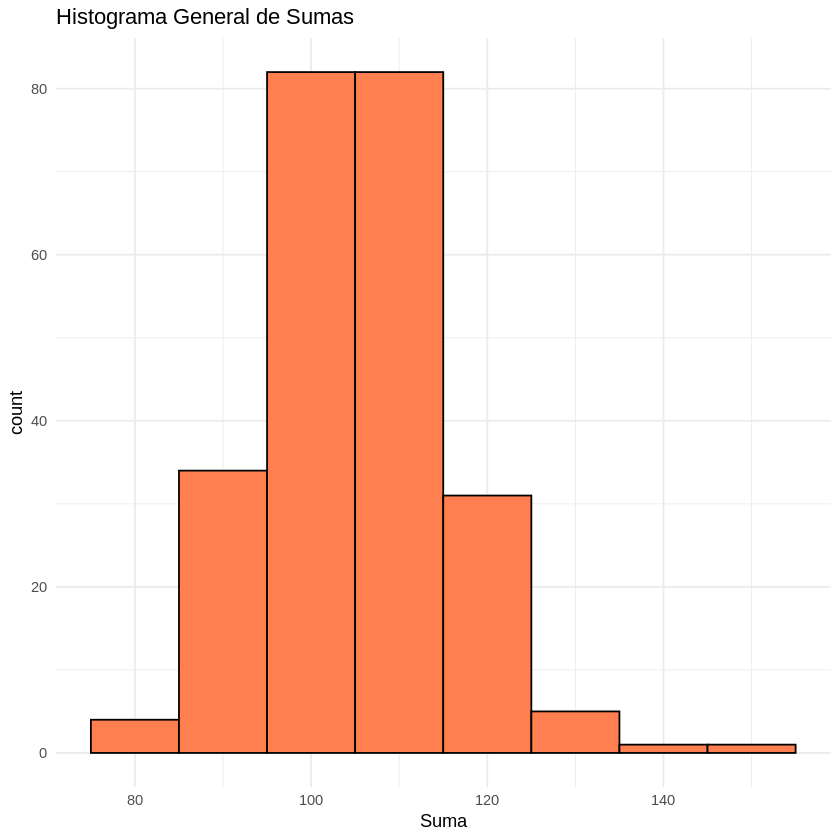

In [ ]:
# Histogramas generales
todas_sumas <- unlist(lapply(resultados, function(x) x$sumas))
todas_promedios <- unlist(lapply(resultados, function(x) x$promedios))

df_all_sumas <- data.frame(Suma = todas_sumas)
ggplot(df_all_sumas, aes(x = Suma)) +
  geom_histogram(binwidth = 10, fill = "coral", color = "black") +
  ggtitle("Histograma General de Sumas") +
  theme_minimal()

In [ ]:
#Este histograma describe que los promedios se centran alrededor del valor 3.5,se encuentra un poco sesgada a la izquierda.

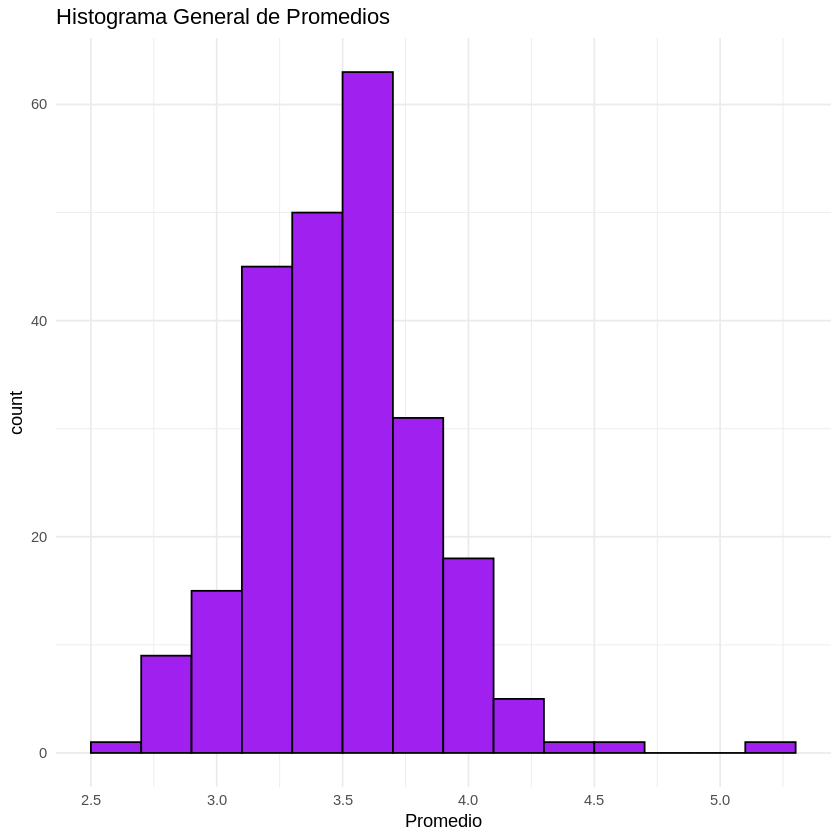

In [ ]:
df_all_prom <- data.frame(Promedio = todas_promedios)
ggplot(df_all_prom, aes(x = Promedio)) +
  geom_histogram(binwidth = 0.2, fill = "purple", color = "black") +
  ggtitle("Histograma General de Promedios") +
  theme_minimal()

In [ ]:
#Se centran notablemente alredor del valor 120,es más dispersa a la variablididad .